In [ ]:
#### WEB SCRAPING NO NEED TO RUN IT AGAIN THE SCRAPED DATA IS SAVED TO A CSV FILE


# import requests
# from bs4 import BeautifulSoup
# import csv
# import time
# from concurrent.futures import ThreadPoolExecutor

# def scrape_page(page):
#     session = requests.Session()
#     url = f'https://phishtank.org/phish_search.php?page={page}&valid=y'
#     try:
#         response = session.get(url)
#         response.raise_for_status()
#     except requests.exceptions.RequestException as e:
#         print(f"An error occurred while fetching the URL: {e}")
#         return []

#     soup = BeautifulSoup(response.content, 'html.parser')
#     rows = soup.find_all('tr')[1:]
#     phish_data = []

#     for row in rows:
#         columns = row.find_all('td')
#         phish_url = columns[1].text.strip()
#         added_index = phish_url.find("added")
#         if added_index != -1:
#             phish_url = phish_url[:added_index].strip()
#         phish_data.append(phish_url)

#     return phish_data

# def main():
#     num_pages = 10000
#     all_phish_data = []

#     # Use ThreadPoolExecutor to parallelize requests
#     with ThreadPoolExecutor(max_workers=10) as executor:
#         for phish_data in executor.map(scrape_page, range(1, num_pages + 1)):
#             all_phish_data.extend(phish_data)
#             print(f"Scraped {len(phish_data)} URLs")

#     # Save the scraped data to a CSV file
#     with open('phishing_urls.csv', 'w', newline='', encoding='utf-8') as csvfile:
#         csvwriter = csv.writer(csvfile)
#         csvwriter.writerow(['URL'])
#         for url in all_phish_data:
#             csvwriter.writerow([url])

# if __name__ == "__main__":
#     main() 


In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame named phish_data
df = pd.read_csv('phishing_urls.csv')

print(f"DataFrame shape: {df.shape}")
df

DataFrame shape: (200000, 1)


,URL
0,https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...
1,https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...
2,https://ser556ee-101018.square.site/
3,https://inconfidenciaautoescola.com.br/webmast...
4,https://automaissorriso.com.br/
...,...
199995,http://www.myjcesoeb.myjoacb.tvuxev.top/
199996,http://www.myjcesceb.myjescb.csagj.top/
199997,http://www.myjcesoeb.myjoacb.txuhj.top/
199998,http://www.myjcesceb.myjescb.dcxpak.top/


In [ ]:
#adding the label "malicious" to the data we scraped
df["label"] = "malicious"
print(df)

                                                      URL      label
0       https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...  malicious
1       https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...  malicious
2                    https://ser556ee-101018.square.site/  malicious
3       https://inconfidenciaautoescola.com.br/webmast...  malicious
4                         https://automaissorriso.com.br/  malicious
...                                                   ...        ...
199995           http://www.myjcesoeb.myjoacb.tvuxev.top/  malicious
199996            http://www.myjcesceb.myjescb.csagj.top/  malicious
199997            http://www.myjcesoeb.myjoacb.txuhj.top/  malicious
199998           http://www.myjcesceb.myjescb.dcxpak.top/  malicious
199999           http://www.myjcesoeb.myjoacb.ugmutx.top/  malicious

[200000 rows x 2 columns]


In [ ]:
#importing the kaggle dataset
import pandas as pd
data = pd.read_csv('urldata.csv', nrows=None)
df2 = pd.DataFrame(data)
df2

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1


In [ ]:
df2 = df2.rename(columns={'url': 'URL'})
df2 = df2[['URL', 'label']]
df2

,URL,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign
...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious
450174,http://atualizapj.com/,malicious


In [ ]:
#merging the 2 dataframes
urldata = pd.concat([df, df2], axis=0)

# reset the index of the new dataframe
urldata = urldata.reset_index(drop=True)
urldata

,URL,label
0,https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...,malicious
1,https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...,malicious
2,https://ser556ee-101018.square.site/,malicious
3,https://inconfidenciaautoescola.com.br/webmast...,malicious
4,https://automaissorriso.com.br/,malicious
...,...,...
650171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious
650172,http://faboleena.com/js/infortis/jquery/plugin...,malicious
650173,http://faboleena.com/js/infortis/jquery/plugin...,malicious
650174,http://atualizapj.com/,malicious


In [ ]:
#checking for missing values
urldata.isnull().sum()


URL      0
label    0
dtype: int64

In [ ]:
urldata = urldata.drop_duplicates(subset='URL', keep='first')


In [ ]:
num_duplicates = urldata.duplicated(subset=['URL']).sum()
print(f"Number of duplicated rows in 'URL' column: {num_duplicates}")


Number of duplicated rows in 'URL' column: 0


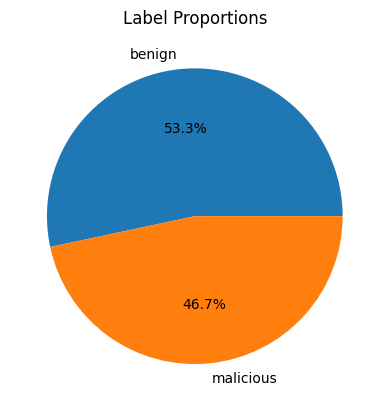

In [ ]:
#visualisation of label proportions
label_counts = urldata['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Proportions')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:
urldata['label'] = urldata['label'].replace({'benign': 0, 'malicious': 1})


<ipython-input-14-339aa38b4599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urldata['label'] = urldata['label'].replace({'benign': 0, 'malicious': 1})


In [ ]:
# reset the index of the new dataframe
urldata = urldata.reset_index(drop=True)
urldata

,URL,label
0,https://bafybeigvnd42jom7e3wimgpo2abup6bsnp53c...,1
1,https://ser556ee-101018.square.site/,1
2,https://inconfidenciaautoescola.com.br/webmast...,1
3,https://automaissorriso.com.br/,1
4,https://attdomainvbb.weeblysite.com/,1
...,...,...
648206,http://ecct-it.com/docmmmnn/aptgd/index.php,1
648207,http://faboleena.com/js/infortis/jquery/plugin...,1
648208,http://faboleena.com/js/infortis/jquery/plugin...,1
648209,http://atualizapj.com/,1


## MODELING 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:


# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(urldata['URL'])
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(url.split()) for url in urldata['URL']])
X = pad_sequences(tokenizer.texts_to_sequences(urldata['URL']), maxlen=max_length)
y = urldata['label'].values



In [ ]:


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, MaxPooling1D, Dropout
from keras.regularizers import l2

# Model architecture
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 32
filters = 64
kernel_size = 5
lstm_units = 32
l2_regularizer = l2(0.001)

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', kernel_regularizer=l2_regularizer),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Bidirectional(LSTM(units=lstm_units, activation='tanh', recurrent_activation='sigmoid', kernel_regularizer=l2_regularizer)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2_regularizer)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])




Epoch 1/10
12965/12965 [==============================] - 226s 16ms/step - loss: 0.0491 - accuracy: 0.9903 - val_loss: 0.0361 - val_accuracy: 0.9933
Epoch 2/10
12965/12965 [==============================] - 196s 15ms/step - loss: 0.0204 - accuracy: 0.9968 - val_loss: 0.0531 - val_accuracy: 0.9815
Epoch 3/10
12965/12965 [==============================] - 186s 14ms/step - loss: 0.0133 - accuracy: 0.9983 - val_loss: 0.0657 - val_accuracy: 0.9630
Epoch 4/10
12965/12965 [==============================] - 193s 15ms/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 0.0335 - val_accuracy: 0.9937
Epoch 5/10
12965/12965 [==============================] - 185s 14ms/step - loss: 0.0101 - accuracy: 0.9989 - val_loss: 0.0324 - val_accuracy: 0.9934
Epoch 6/10
12965/12965 [==============================] - 193s 15ms/step - loss: 0.0092 - accuracy: 0.9991 - val_loss: 0.0386 - val_accuracy: 0.9930
Epoch 7/10
12965/12965 [==============================] - 181s 14ms/step - loss: 0.0085 - accuracy: 0.9993

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy : {accuracy}")

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")


Test accuracy : 0.9940297603607178
4052/4052 [==============================] - 19s 5ms/step - loss: 0.0124 - accuracy: 0.9984
Validation loss: 0.012430358678102493, Validation accuracy: 0.9984264373779297


In [ ]:
model.save('urlmodel.h5')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('urlmodel.h5')


In [ ]:
from google.colab import files
files.download("urlmodel.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>